# Diabetes Cluster analysis
Using unsupervised machine learning to analyse patterns in daibetes patients data.

Data source - [Diabetes Data, Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

## Importing necessary libraries

In [25]:
import numpy as np  # Numerical operations
import pandas as pd  # Data analysis and manipulation
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting
plt.style.use("ggplot")  # Setting style to ggplot for aesthetically pleasing graphs
import warnings  # Suppressing warnings
warnings.filterwarnings("ignore")  # Ignoring warnings for cleaner output
from sklearn.preprocessing import StandardScaler  # Standardizing data
from sklearn.cluster import KMeans  # K-means clustering algorithm

### Loading in the data 

In [26]:
# Read the diabetes data from the CSV file
df = pd.read_csv('diabetes.csv')

# display the first 5 rows of data 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection

In [27]:
# Select relevant features for analysis
use_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
            "BMI", "DiabetesPedigreeFunction", "Age"]

# Extract data using the selected features
data = df[use_cols]

## Exploratory data analysis

In [30]:
# Get summary  information of the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


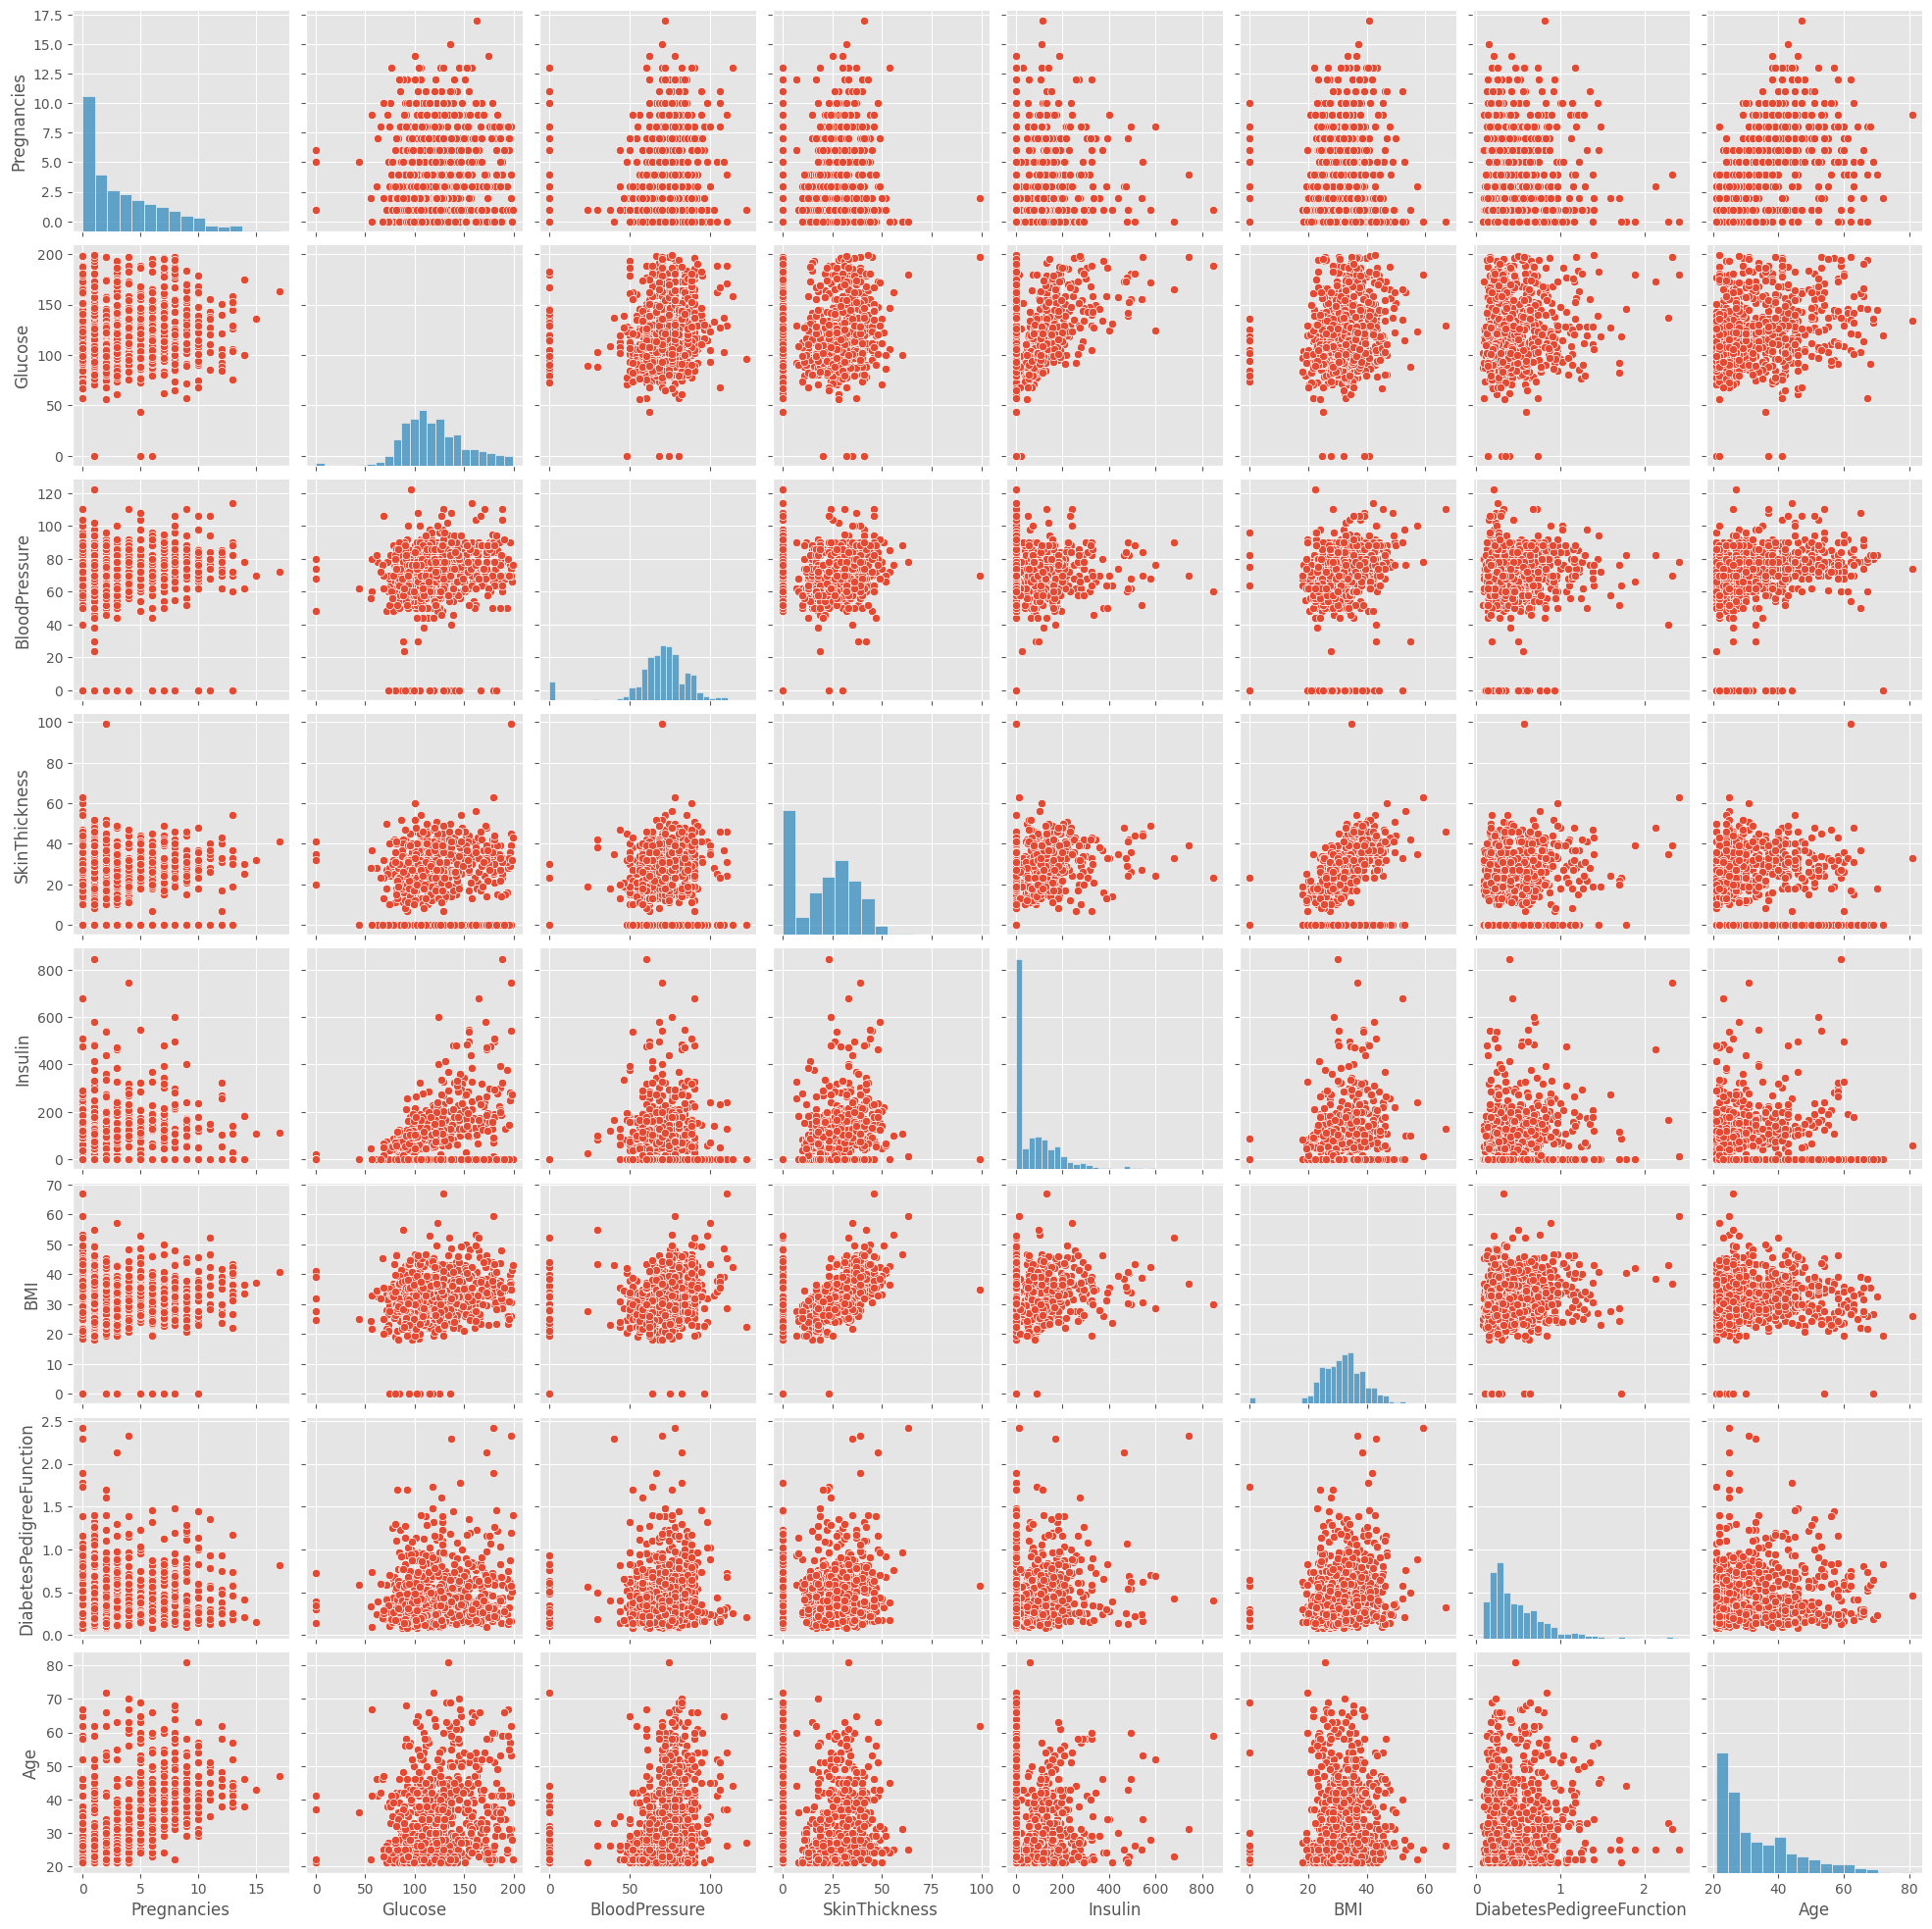

In [28]:
# Create a pairplot to visualize pairwise relationships between features
sns.pairplot(data)
plt.show()

## Correlation Heatmap of features 

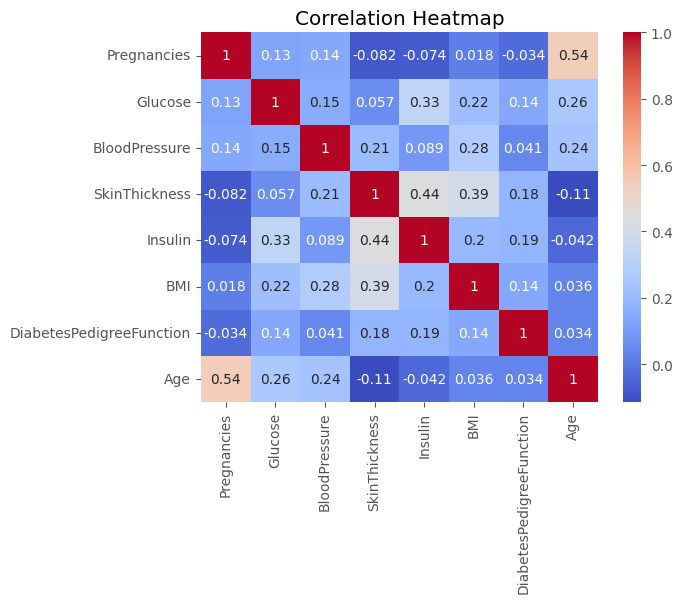

In [29]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# add title to plot
plt.title('Correlation Heatmap')

# display plot 
plt.show()

## Normalizing the data

In [8]:
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the data
data = scaler.fit_transform(data)

## kmeans elbow method

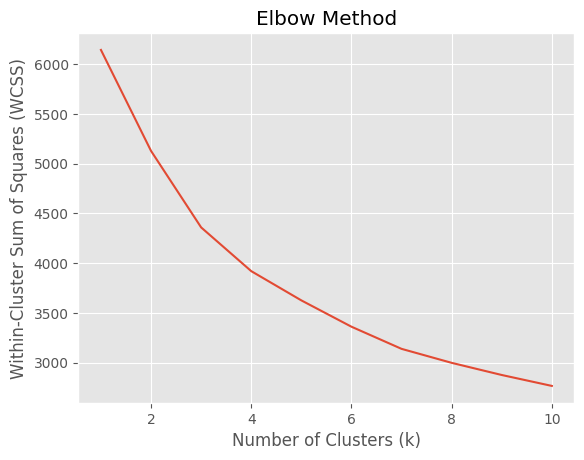

In [9]:
# Calculate WCSS for different k values
wcss = []
for k in range(1, 11):
    # Create KMeans model with specific parameters
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)  # Initialize with k clusters, use k-means++ for less random centroid placement, and specify random state for reproducibility.
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Extract the inertia (WCSS) for the current k value
    wcss.append(kmeans.inertia_)  # inertia represents the sum of squared distances of points to their respective cluster centroids.

# Plot the WCSS vs k
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

### Perform k-means clustering 

In [10]:
# Choose the value of k where the WCSS starts to plateau
elbow = 3  # The elbow is at k=3

# Perform k-means clustering with the chosen k value
kmeans = KMeans(n_clusters=elbow)
kmeans.fit(data)

# Print the cluster labels
y_kmeans = kmeans.labels_


## PCA for Dimension Reduction

In [11]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)  # Choose the desired number of components

# Apply PCA to the standardized data
reduced_data = pca.fit_transform(data)

# Print the reduced data
print(sum(pca.explained_variance_))

3.830577817441653


## Visuaize Clusters and their groups

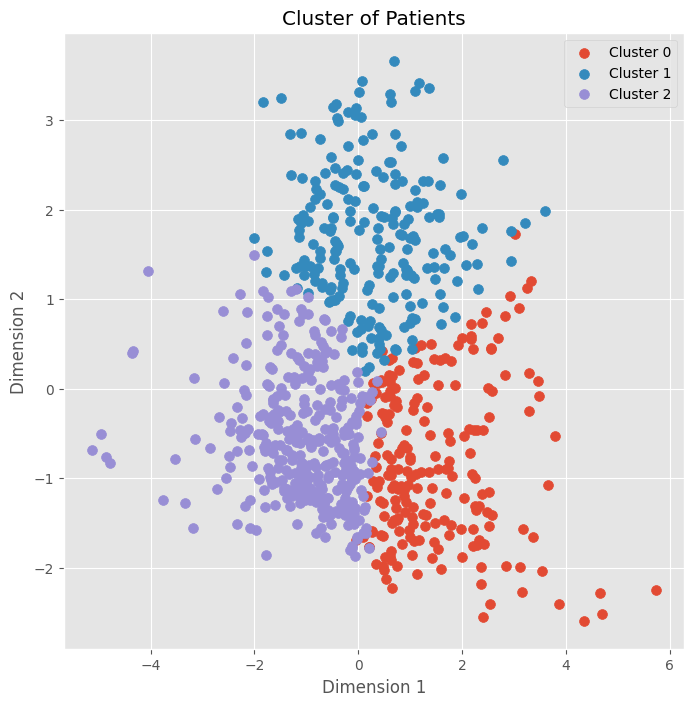

In [12]:

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(reduced_data [y_kmeans == i,0], reduced_data [y_kmeans == i,1], label = f'Cluster {i}', s = 50)

plt.title('Cluster of Patients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

## DBSCAN Clustering 

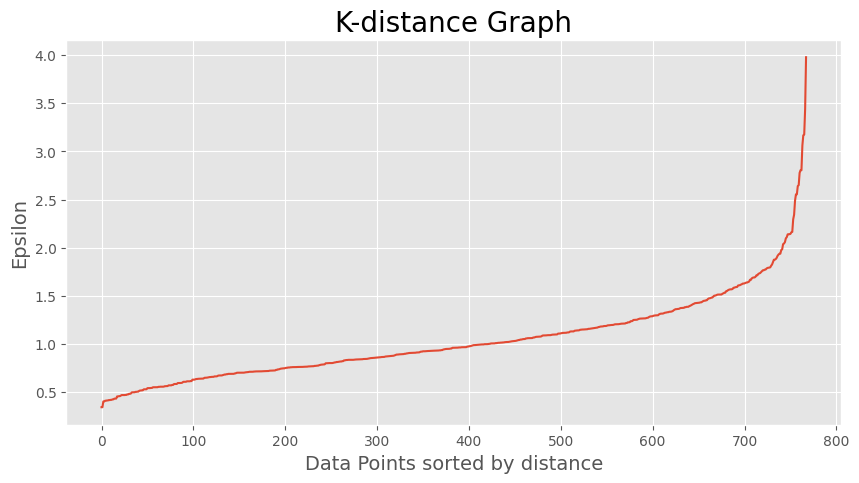

In [13]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Create NearestNeighbors object with k = 2
neigh = NearestNeighbors(n_neighbors=2)

# Fit the nearest neighbors model to the data
nbrs = neigh.fit(data)

# Extract distances and indices of nearest neighbors
distances, indices = nbrs.kneighbors(data)

# Sort distances
distances = np.sort(distances, axis=0)

# Select second nearest neighbor distances (epsilon candidates)
distances = distances[:, 1]

# Plot K-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-distance Graph", fontsize=20)
plt.xlabel("Data Points sorted by distance", fontsize=14)
plt.ylabel("Epsilon", fontsize=14)
plt.show()

In [17]:
# Initialize DBSCAN model with chosen parameters
dbscan_opt = DBSCAN(eps=1.75, min_samples=50)

# Fit the DBSCAN model to the data
dbscan_opt.fit(data)

DBSCAN(eps=1.75, min_samples=50)

### Visualize DBSCAN clusters 

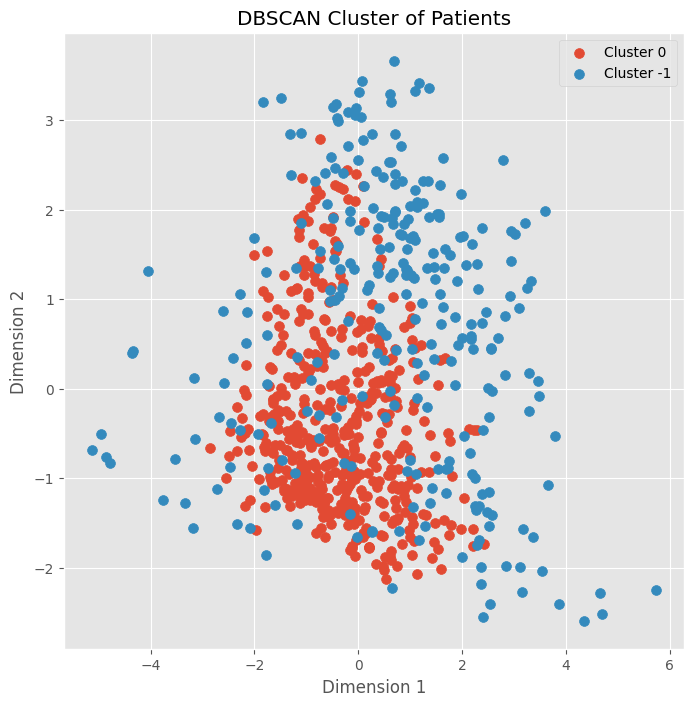

In [18]:
# Extract cluster labels from the fitted DBSCAN model
y_dbscan = dbscan_opt.labels_

# Identify unique cluster labels
clusters = list(set(y_dbscan))

# Plot the clusters
plt.figure(figsize=(8, 8))
for i in clusters:
    # Filter data points belonging to each cluster
    cluster_data = reduced_data[y_dbscan == i]
    
    # Plot the cluster data with specific label and size
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i}", s=50)

# Add informative plot title and labels
plt.title("DBSCAN Cluster of Patients")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display legend with cluster labels
plt.legend()
plt.show()


## Evaluating the clustering methods

In [19]:
# Import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Evaluate KMeans clustering
print("KMeans Evaluation Measures")
print("********************************")

# Calculate Davies-Bouldin index
db_score = davies_bouldin_score(data, y_kmeans)
print("Davies-Bouldin Index:", f"{db_score:.3f}")

# Calculate Silhouette coefficient
s_score = silhouette_score(data, y_kmeans)
print("Silhouette Coefficient:", f"{s_score:.3f}")

# Evaluate DBSCAN clustering
print("\n")
print("DBScan Evaluation Measures")
print("********************************")

# Calculate Davies-Bouldin index
db_score = davies_bouldin_score(data, y_dbscan)
print("Davies-Bouldin Index:", f"{db_score:.3f}")

# Calculate Silhouette coefficient
s_score = silhouette_score(data, y_dbscan)
print("Silhouette Coefficient:", f"{s_score:.3f}")

KMeans Evaluation Measures
********************************
Davies-Bouldin Index: 1.677
Silhouette Coefficient: 0.182


DBScan Evaluation Measures
********************************
Davies-Bouldin Index: 3.292
Silhouette Coefficient: 0.188
